In [1]:
from keras.layers import Dense, Input, Conv2D, Conv2DTranspose, Lambda, Flatten, Reshape, MaxPooling2D
from keras.models import Model
from keras.losses import mean_squared_error, binary_crossentropy, kullback_leibler_divergence
from keras.callbacks import EarlyStopping, TerminateOnNaN, ReduceLROnPlateau
from keras import backend as K
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, scipy
from sklearn.model_selection import train_test_split

from phenom_read_in_data import *

Using TensorFlow backend.


In [43]:
pd.set_option('display.max_columns', 75)

In [44]:
#Getthe data
df = csv_to_df('ttbarZ/')

In [45]:
df

,event_ID,process_ID,event_weight,MET,MET_Phi,obj1,E1,pt1,eta1,phi1,obj2,E2,pt2,eta2,phi2,obj3,E3,pt3,eta3,phi3,obj4,E4,pt4,eta4,phi4,obj5,E5,pt5,eta5,phi5,obj6,E6,pt6,eta6,phi6,obj7,E7,pt7,eta7,phi7,obj8,E8,pt8,eta8,phi8,obj9,E9,pt9,eta9,phi9,obj10,E10,pt10,eta10,phi10,obj11,E11,pt11,eta11,phi11,obj12,E12,pt12,eta12,phi12,obj13,E13,pt13,eta13,phi13
0,21,ttbarZ,1,43924.6,-0.38825,j,165476,165097,-0.0171131,-1.54448,j,163744,161051,-0.127864,1.89464,b,86228.2,78559.5,-0.393297,3.05707,j,68231.7,67934.1,-0.0262432,1.12407,j,40452,36900.9,-0.419573,-2.32306,j,36919.8,34203.1,0.303205,-0.614197,j,31126.3,24639.1,0.678827,0.396069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,21,ttbarZ,1,45289,-3.09984,j,105746,95333.9,0.449145,1.79273,j,106214,92717.5,-0.52132,-0.624799,j,273538,63046.7,2.14564,0.166455,b,74094.3,53404,0.848482,-1.91912,j,37460.9,36739.6,0.183794,3.06706,b,45106.4,36630.5,-0.642508,-2.75669,j,72748.1,34023.2,-1.38809,0.632568,j,135412,29152.7,2.21505,2.39706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21,ttbarZ,1,16530.4,-3.09183,b,144211,137971,0.100321,-0.0772316,j,195882,87466,1.44049,2.31974,j,152950,65054.9,1.49544,-3.03641,b,89301.6,61292.3,0.915048,-1.8527,j,332144,44061.6,2.70825,0.615086,j,56815.5,35907.4,-1.03082,-1.96102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21,ttbarZ,1,18362.9,1.14058,b,370358,120835,1.78374,-0.757091,j,156700,107113,0.912321,2.38575,j,90473.5,79780.5,-0.504302,-2.71376,j,116668,72019.3,1.04829,-0.322966,b,277522,70059.8,2.05196,0.062623,j,487093,68214.4,2.65376,2.27298,j,148612,45663.6,1.84695,-2.93225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21,ttbarZ,1,232797,-2.74669,j,436613,432317,-0.110325,0.656242,b,185625,182595,-0.0154071,-2.69834,j,202016,134513,-0.949922,-0.73823,j,153539,71250.1,-1.40028,2.0433,j,80299.9,52919.8,0.974133,-2.44932,j,162664,46091.9,-1.93104,-2.30425,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5869,21,ttbarZ,1,17569.3,3.08905,j,223425,161759,-0.840404,2.52008,b,212922,150108,0.871115,-1.46624,j,107559,104874,-0.09206,1.86163,j,521781,87172.3,2.47494,-0.528776,j,110667,84358.7,0.754226,0.234181,j,319253,52431.5,-2.49247,2.77751,j,43875.6,39472.2,-0.46807,-1.35213,j,159489,35116,2.19302,1.42717,j,76563.8,26379.1,1.72649,-0.62969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5870,21,ttbarZ,1,70402.4,-1.12592,b,340938,86263.4,-2.05015,-0.018614,b,80266,79630.8,0.0892557,1.44809,j,98983.4,56366.9,-1.1629,2.92059,j,44193.9,44005.6,-0.0908837,-2.35942,j,46323.3,42138.8,0.404271,2.09979,j,149315,27061.5,-2.39208,-1.38726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5871,21,ttbarZ,1,28553.9,0.862966,j,116154,114311,0.0884322,-2.74727,j,193623,94304.2,1.3457,1.29583,b,164252,66516.6,1.54902,0.167349,j,332013,40321.4,-2.79728,0.600107,j,37773.4,29133.9,0.709713,-1.52097,j,73094.2,27742.1,-1.62051,-1.09525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5872,21,ttbarZ,1,183633,1.98713,j,350312,178245,1.29249,0.477881,j,112870,109878,0.218633,-2.54255,j,81252,74631.8,-0.354966,-1.88837,j,167830,71985.2,-1.48892,-1.91709,j,325596,53747.1,-2.48624,-0.555373,b,42017.8,3696

In [46]:
df.describe()

,event_ID,process_ID,event_weight,MET,MET_Phi,obj1,E1,pt1,eta1,phi1,obj2,E2,pt2,eta2,phi2,obj3,E3,pt3,eta3,phi3,obj4,E4,pt4,eta4,phi4,obj5,E5,pt5,eta5,phi5,obj6,E6,pt6,eta6,phi6,obj7,E7,pt7,eta7,phi7,obj8,E8,pt8,eta8,phi8,obj9,E9,pt9,eta9,phi9,obj10,E10,pt10,eta10,phi10,obj11,E11,pt11,eta11,phi11,obj12,E12,pt12,eta12,phi12,obj13,E13,pt13,eta13,phi13
count,5874,5874,5874,5874,5874,5874,5874,5874,5874,5874,5871,5871,5871,5871,5871,5825,5825,5825,5825,5825,5583,5583,5583,5583,5583,4970,4970,4970,4970,4970,3792,3792,3792,3792,3792,2339,2339,2339,2339,2339,1158,1158,1158,1158,1158,434,434,434,434,434,139,139,139,139,139,35,35,35,35,35,10,10,10,10,10,2,2,2,2,2
unique,1,1,1,5859,5847,2,5843,5818,5859,5856,6,5831,5826,5859,5839,7,5799,5805,5804,5805,7,5561,5562,5564,5570,7,4950,4953,4955,4948,7,3788,3781,3784,3788,7,2331,2322,2335,2336,7,1155,1156,1157,1157,7,434,434,434,434,7,139,139,139,139,6,35,35,35,35,3,10,10,10,10,1,2,2,2,2
top,21,ttbarZ,1,105323,-1.15702,j,101480,137959,-1.60639,-1.7008,j,140788,107334,1.94753,-1.24283,j,57119.6,113845,-1.27353,-1.33961,j,105084,29668.1,-1.81589,-2.82383,j,126667,27186.3,2.28923,2.15548,j,115633,33471.8,-1.59634,2.13339,j,34833.2,30209.8,-2.04241,3.02596,j,30173.3,23922.7,-1.59418,-2.30007,j,56586.7,52792.5,-1.92779,-1.66469,j,96573.5,35278.6,-0.131001,2.80453,j,46720.3,29509.5,-0.715826,1.89091,j,76906.5,27271.7,1.70133,1.26894,j,42197.8,35040.1,0.23484,0.640652
freq,5874,5874,5874,2,2,3967,2,3,2,2,3986,2,2,2,2,4220,2,2,2,2,4129,2,2,2,2,3644,2,2,2,2,2726,2,2,2,2,1678,2,2,2,2,770,2,2,2,2,300,1,1,1,1,98,1,1,1,1,27,1,1,1,1,8,1,1,1,1,2,1,1,1,1


In [4]:
#If the number of max objects is prime, another column needs to be added to mitigate 

In [5]:
df['obj14']= -999
df['E14'] = -999
df['pt14'] = -999
df['eta14'] = -999
df['phi14'] = -999

In [6]:
df = df.fillna(-999)
variables = [entry for entry in df.columns if entry[0] == 'E'] + [entry for entry in df.columns if entry[0:2] == 'pt'] + [entry for entry in df.columns if entry[0:2] == 'et'] + [entry for entry in df.columns if entry[0:2] == 'ph']

In [7]:
objects = []
for i in df.columns:
    if i[:3] == 'obj':
        objects.append(i)

In [9]:
b_objects1 = df.loc[df['obj1'] == 'b', df.columns[6:10]]

In [10]:
b_objects1

,E1,pt1,eta1,phi1
2,144211,137971,0.100321,-0.0772316
3,370358,120835,1.78374,-0.757091
14,148059,146337,-0.126395,-2.48672
15,209567,107772,-1.27924,1.69015
17,188912,124490,-0.97313,2.38879
...,...,...,...,...
5860,105653,103890,0.00173553,-1.41436
5862,324066,200746,1.05563,-0.432939
5865,225909,206183,-0.429249,2.96939
5866,269968,264990,-0.160639,-2.5178


In [11]:
b_objects2 = df.loc[df['obj2'] == 'b', df.columns[11:15]]

In [12]:
b_objects2 = df.loc[df['obj2'] == 'b', df.columns[11:15]]
b_objects3 = df.loc[df['obj3'] == 'b', df.columns[16:20]]
b_objects4 = df.loc[df['obj4'] == 'b', df.columns[21:25]]
b_objects5 = df.loc[df['obj5'] == 'b', df.columns[26:30]]
b_objects6 = df.loc[df['obj6'] == 'b', df.columns[31:35]]
b_objects7 = df.loc[df['obj7'] == 'b', df.columns[36:40]]
b_objects8 = df.loc[df['obj8'] == 'b', df.columns[41:45]]
b_objects9 = df.loc[df['obj9'] == 'b', df.columns[46:50]]
b_objects10 = df.loc[df['obj10'] == 'b', df.columns[51:55]]
b_objects11 = df.loc[df['obj11'] == 'b', df.columns[56:60]]
b_objects12 = df.loc[df['obj12'] == 'b', df.columns[61:65]]
b_objects13 = df.loc[df['obj13'] == 'b', df.columns[66:70]]
b_objects14 = df.loc[df['obj14'] == 'b', df.columns[71:75]]

/home/joe/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [13]:
b_objs = [b_objects1, b_objects2, b_objects3, b_objects4, b_objects5, b_objects6, b_objects7, b_objects8, 
         b_objects9, b_objects10, b_objects11, b_objects12, b_objects13, b_objects14]

In [14]:
data = pd.concat(b_objs, sort=False)

In [15]:
data

,E1,pt1,eta1,phi1,E2,pt2,eta2,phi2,E3,pt3,...,eta12,phi12,E13,pt13,eta13,phi13,E14,pt14,eta14,phi14
2,144211,137971,0.100321,-0.0772316,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,370358,120835,1.78374,-0.757091,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,148059,146337,-0.126395,-2.48672,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,209567,107772,-1.27924,1.69015,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,188912,124490,-0.97313,2.38879,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
data = data.fillna(-999)

In [17]:
data['process_ID'] = 'ttbarZ'

In [18]:
data

,E1,pt1,eta1,phi1,E2,pt2,eta2,phi2,E3,pt3,...,phi12,E13,pt13,eta13,phi13,E14,pt14,eta14,phi14,process_ID
2,144211,137971,0.100321,-0.0772316,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999.0,-999.0,-999.0,-999.0,ttbarZ
3,370358,120835,1.78374,-0.757091,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999.0,-999.0,-999.0,-999.0,ttbarZ
14,148059,146337,-0.126395,-2.48672,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999.0,-999.0,-999.0,-999.0,ttbarZ
15,209567,107772,-1.27924,1.69015,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999.0,-999.0,-999.0,-999.0,ttbarZ
17,188912,124490,-0.97313,2.38879,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999.0,-999.0,-999.0,-999.0,ttbarZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2941,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999.0,-999.0,-999.0,-999.0,ttbarZ
5114,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999.0,-999.0,-999.0,-999.0,ttbarZ
1252,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999.0,-999.0,-999.0,-999.0,ttbarZ
1653,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999.0,-999.0,-999.0,-999.0,ttbarZ


In [19]:
one_hot = pd.get_dummies(data['process_ID'])
processes = one_hot.columns
data.drop('process_ID', axis = 'columns', inplace = True)
data = pd.concat([data, one_hot], sort = False, axis = 1)

In [20]:
data

,E1,pt1,eta1,phi1,E2,pt2,eta2,phi2,E3,pt3,...,phi12,E13,pt13,eta13,phi13,E14,pt14,eta14,phi14,ttbarZ
2,144211,137971,0.100321,-0.0772316,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999.0,-999.0,-999.0,-999.0,1
3,370358,120835,1.78374,-0.757091,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999.0,-999.0,-999.0,-999.0,1
14,148059,146337,-0.126395,-2.48672,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999.0,-999.0,-999.0,-999.0,1
15,209567,107772,-1.27924,1.69015,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999.0,-999.0,-999.0,-999.0,1
17,188912,124490,-0.97313,2.38879,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999.0,-999.0,-999.0,-999.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2941,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999.0,-999.0,-999.0,-999.0,1
5114,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999.0,-999.0,-999.0,-999.0,1
1252,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999.0,-999.0,-999.0,-999.0,1
1653,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999.0,-999.0,-999.0,-999.0,1


In [21]:
variables = [entry for entry in df.columns if entry[0] == 'E'] + [entry for entry in df.columns if entry[0:2] == 'pt'] + [entry for entry in df.columns if entry[0:2] == 'et'] + [entry for entry in df.columns if entry[0:2] == 'ph']

In [22]:
#We have created a df of our values and some kind of class label
#We should normalize
x = data[variables].values
x_scaled = StandardScaler().fit_transform(x)
data[variables] = x_scaled

x_train, x_test, y_train, y_test = train_test_split(data[variables].values,
						    data[processes].values, 
                                                    shuffle = True,
                                                    random_state = 42,
                                                    test_size = 0.1)

In [23]:
#Reshape the data. This will have to be done explicitly until you think of a clever way of doing it
x_train = x_train.reshape((x_train.shape[0], 4, 2, 7))
x_test = x_test.reshape((x_test.shape[0], 4, 2, 7))

In [24]:
def sampling(args):
    z_mean, z_log_var=args
    epsilon=tf.random.uniform(shape=(K.shape(z_mean)[0], latent_dim))
    return z_mean+K.exp(z_log_var/2)*epsilon

In [25]:
#VAE Model
original_dim = x_train.shape[0]
input_shape = x_train.shape[1:]
latent_dim = 4
intermediate_dim = 50
kernel_max_norm = 1000.
act_fun = 'relu'
epsilon_std = 1.
filters = 32
kernel_size = (3, 3)
strides = (1, 1)


In [26]:
#Layers
x_input = Input(shape = input_shape, name = 'Input')
conv_1 = Conv2D(filters = filters, 
                activation = act_fun,
                kernel_size = kernel_size,
                strides = strides, 
                padding = 'same')(x_input)
pool_1 = MaxPooling2D(pool_size = (1, 1),
                      strides = 2,
                      #data_format = 'channels_first'
                     )(conv_1)
conv_2 = Conv2D(filters = filters, 
                activation = act_fun, 
                kernel_size = kernel_size, 
                strides = strides, 
                padding = 'same')(pool_1)

#Shape info needed to inform the dense layer in the decoder
flatten = Flatten()(conv_2)
#cnn = Model(x_input, flatten, name = 'cnn')
#cnn.summary()

shape = input_shape

In [27]:
#Encoding
dense_encoder_1 = Dense(intermediate_dim,
                        activation = act_fun,
                        name = 'dense_encoder_1')(flatten)
dense_encoder_2 = Dense(16,
                        activation = act_fun,
                        name = 'dense_encoder_2')(dense_encoder_1)
z_mean = Dense(latent_dim, name = 'z_mean')(dense_encoder_2)
z_var = Dense(latent_dim, name = 'z_var')(dense_encoder_2)

z = Lambda(sampling, output_shape = (latent_dim, ), name = 'sampling')([z_mean, z_var])

encoder = Model(x_input, [z_mean, z_var, z], name = 'encoder')
encoder.summary()


Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input (InputLayer)              (None, 4, 2, 7)      0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 4, 2, 32)     2048        Input[0][0]                      
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 2, 1, 32)     0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 2, 1, 32)     9248        max_pooling2d_1[0][0]            
____________________________________________________________________________________________

In [28]:
#Decoding
decoder_input = Input(shape = (latent_dim, ), name = 'decoder_input')
dense_decoder_1 = Dense(shape[0]*shape[1]*shape[2], 
                        activation = act_fun, name = 'dense_decoder_1')(decoder_input)
reshape = Reshape((shape[0], shape[1], shape[2]))(dense_decoder_1)

deconv_1 = Conv2DTranspose(filters = filters,
                           kernel_size = kernel_size, 
                           activation = act_fun, 
                           strides = strides, 
                           padding = 'same', 
                           name = 'deconv_1')(reshape)
deconv_2 = Conv2DTranspose(filters = 16,
                           kernel_size = kernel_size, 
                           activation = act_fun, 
                           strides = strides, 
                           padding = 'same', 
                           name = 'deconv_2')(deconv_1)

output = Conv2DTranspose(filters = 7, 
                         kernel_size = kernel_size, 
                         activation = 'sigmoid', 
                         padding = 'same', 
                         strides = strides, 
                         name = 'decoder_output')(deconv_2)

decoder = Model(decoder_input, output, name = 'decoder')
decoder.summary()


Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   (None, 4)                 0         
_________________________________________________________________
dense_decoder_1 (Dense)      (None, 56)                280       
_________________________________________________________________
reshape_1 (Reshape)          (None, 4, 2, 7)           0         
_________________________________________________________________
deconv_1 (Conv2DTranspose)   (None, 4, 2, 32)          2048      
_________________________________________________________________
deconv_2 (Conv2DTranspose)   (None, 4, 2, 16)          4624      
_________________________________________________________________
decoder_output (Conv2DTransp (None, 4, 2, 7)           1015      
Total params: 7,967
Trainable params: 7,967
Non-trainable params: 0
_________________________________________________________

In [29]:
#Build the VAE model
outputs = decoder(encoder(x_input)[2])
vae = Model(x_input, outputs, name = 'vae')

In [30]:
#Define some losses
def kl_loss(y_true, y_pred):
    kl_loss = 1 + z_var - K.square(z_mean) - K.exp(z_var)
    kl_loss = K.sum(kl_loss, axis=-1)
    kl_loss *= -0.5
    #kl_loss = K.mean(kl_loss)
    return kl_loss

def recon_loss(y_true, y_pred):
    recon_loss = mean_squared_error(K.flatten(y_true), K.flatten(y_pred))
    recon_loss *= shape[0]*shape[1]*shape[2]
    #recon_loss = K.mean(recon_loss)
    return recon_loss

def my_vae_loss(y_true, y_pred):
    recon = recon_loss(y_true, y_pred) 
    kl = kl_loss(y_true, y_pred)
    vae_loss = recon + kl
    return vae_loss


In [31]:
vae.compile(optimizer = 'rmsprop', loss = my_vae_loss, metrics = [kl_loss, recon_loss])
vae.summary()


Model: "vae"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           (None, 4, 2, 7)           0         
_________________________________________________________________
encoder (Model)              [(None, 4), (None, 4), (N 15498     
_________________________________________________________________
decoder (Model)              (None, 4, 2, 7)           7967      
Total params: 23,465
Trainable params: 23,465
Non-trainable params: 0
_________________________________________________________________


In [32]:
#Fit the model
epochs = 100
batch_size = 100

history = vae.fit(x = x_train,
                  y = x_train,
                  validation_data = (x_train, x_train),
                  epochs = epochs,
                  batch_size = batch_size,
                  verbose = 2)

vae.save('cnn-vae_model.h5')

Train on 7468 samples, validate on 7468 samples
Epoch 1/100
 - 1s - loss: 43.8352 - kl_loss: 0.1980 - recon_loss: 43.6529 - val_loss: 41.3944 - val_kl_loss: 0.1551 - val_recon_loss: 41.1856
Epoch 2/100
 - 0s - loss: 40.5507 - kl_loss: 0.3340 - recon_loss: 40.1518 - val_loss: 38.7530 - val_kl_loss: 0.6516 - val_recon_loss: 38.0479
Epoch 3/100
 - 0s - loss: 37.5965 - kl_loss: 0.6158 - recon_loss: 36.9724 - val_loss: 36.8370 - val_kl_loss: 0.5683 - val_recon_loss: 36.2146
Epoch 4/100
 - 0s - loss: 36.1736 - kl_loss: 0.5871 - recon_loss: 35.5505 - val_loss: 35.5050 - val_kl_loss: 0.6255 - val_recon_loss: 34.8251
Epoch 5/100
 - 0s - loss: 35.2892 - kl_loss: 0.5569 - recon_loss: 34.7620 - val_loss: 35.1068 - val_kl_loss: 0.5036 - val_recon_loss: 34.5485
Epoch 6/100
 - 0s - loss: 35.0695 - kl_loss: 0.5039 - recon_loss: 34.5734 - val_loss: 34.9092 - val_kl_loss: 0.4386 - val_recon_loss: 34.4166
Epoch 7/100
 - 0s - loss: 34.9526 - kl_loss: 0.4550 - recon_loss: 34.4536 - val_loss: 34.8752 - val_

 - 0s - loss: 34.3269 - kl_loss: 0.2616 - recon_loss: 34.0276 - val_loss: 34.2739 - val_kl_loss: 0.2572 - val_recon_loss: 33.9621
Epoch 59/100
 - 0s - loss: 34.3166 - kl_loss: 0.2658 - recon_loss: 34.0455 - val_loss: 34.2454 - val_kl_loss: 0.2475 - val_recon_loss: 33.9434
Epoch 60/100
 - 0s - loss: 34.3102 - kl_loss: 0.2639 - recon_loss: 33.9899 - val_loss: 34.3574 - val_kl_loss: 0.2374 - val_recon_loss: 34.0650
Epoch 61/100
 - 0s - loss: 34.3166 - kl_loss: 0.2635 - recon_loss: 34.0204 - val_loss: 34.4147 - val_kl_loss: 0.2768 - val_recon_loss: 34.0839
Epoch 62/100
 - 0s - loss: 34.3607 - kl_loss: 0.2648 - recon_loss: 34.0414 - val_loss: 34.3147 - val_kl_loss: 0.2525 - val_recon_loss: 34.0074
Epoch 63/100
 - 0s - loss: 34.3158 - kl_loss: 0.2599 - recon_loss: 34.0544 - val_loss: 34.3230 - val_kl_loss: 0.2867 - val_recon_loss: 33.9816
Epoch 64/100
 - 0s - loss: 34.3225 - kl_loss: 0.2625 - recon_loss: 34.1244 - val_loss: 34.3185 - val_kl_loss: 0.2891 - val_recon_loss: 33.9751
Epoch 65/100

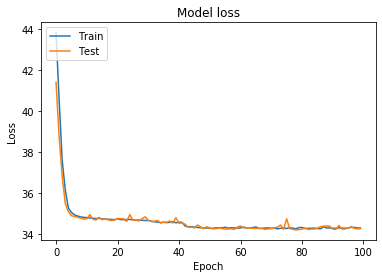

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [34]:
vae.metrics_names

['loss', 'kl_loss', 'recon_loss']

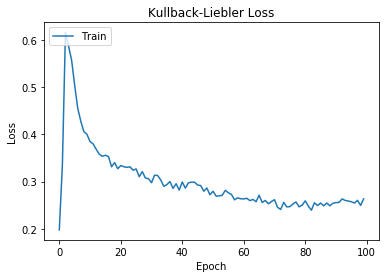

In [35]:
plt.plot(history.history['kl_loss'])
plt.title('Kullback-Liebler Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

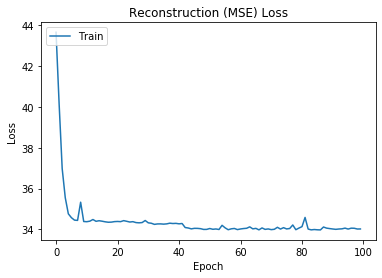

In [36]:
plt.plot(history.history['recon_loss'])
plt.title('Reconstruction (MSE) Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

In [47]:
b_objects1

,E1,pt1,eta1,phi1
2,144211,137971,0.100321,-0.0772316
3,370358,120835,1.78374,-0.757091
14,148059,146337,-0.126395,-2.48672
15,209567,107772,-1.27924,1.69015
17,188912,124490,-0.97313,2.38879
...,...,...,...,...
5860,105653,103890,0.00173553,-1.41436
5862,324066,200746,1.05563,-0.432939
5865,225909,206183,-0.429249,2.96939
5866,269968,264990,-0.160639,-2.5178


In [48]:
data = b_objects1

In [49]:
data = data.fillna(-999)

In [50]:
data['process_ID'] = 'ttbarZ'

In [51]:
data

,E1,pt1,eta1,phi1,process_ID
2,144211,137971,0.100321,-0.0772316,ttbarZ
3,370358,120835,1.78374,-0.757091,ttbarZ
14,148059,146337,-0.126395,-2.48672,ttbarZ
15,209567,107772,-1.27924,1.69015,ttbarZ
17,188912,124490,-0.97313,2.38879,ttbarZ
...,...,...,...,...,...
5860,105653,103890,0.00173553,-1.41436,ttbarZ
5862,324066,200746,1.05563,-0.432939,ttbarZ
5865,225909,206183,-0.429249,2.96939,ttbarZ
5866,269968,264990,-0.160639,-2.5178,ttbarZ


In [52]:
one_hot = pd.get_dummies(data['process_ID'])
processes = one_hot.columns
data.drop('process_ID', axis = 'columns', inplace = True)
data = pd.concat([data, one_hot], sort = False, axis = 1)

In [53]:
data

,E1,pt1,eta1,phi1,ttbarZ
2,144211,137971,0.100321,-0.0772316,1
3,370358,120835,1.78374,-0.757091,1
14,148059,146337,-0.126395,-2.48672,1
15,209567,107772,-1.27924,1.69015,1
17,188912,124490,-0.97313,2.38879,1
...,...,...,...,...,...
5860,105653,103890,0.00173553,-1.41436,1
5862,324066,200746,1.05563,-0.432939,1
5865,225909,206183,-0.429249,2.96939,1
5866,269968,264990,-0.160639,-2.5178,1


In [56]:
variables = [entry for entry in data.columns if entry[0] == 'E'] + [entry for entry in data.columns if entry[0:2] == 'pt'] + [entry for entry in data.columns if entry[0:2] == 'et'] + [entry for entry in data.columns if entry[0:2] == 'ph']

In [57]:
#We have created a df of our values and some kind of class label
#We should normalize
x = data[variables].values
x_scaled = StandardScaler().fit_transform(x)
data[variables] = x_scaled

x_train, x_test, y_train, y_test = train_test_split(data[variables].values,
						    data[processes].values, 
                                                    shuffle = True,
                                                    random_state = 42,
                                                    test_size = 0.1)

In [58]:
#Reshape the data. This will have to be done explicitly until you think of a clever way of doing it
x_train = x_train.reshape((x_train.shape[0], 4, 1, 1))
x_test = x_test.reshape((x_test.shape[0], 4, 1, 1))

In [59]:
def sampling(args):
    z_mean, z_log_var=args
    epsilon=tf.random.uniform(shape=(K.shape(z_mean)[0], latent_dim))
    return z_mean+K.exp(z_log_var/2)*epsilon

In [60]:
#VAE Model
original_dim = x_train.shape[0]
input_shape = x_train.shape[1:]
latent_dim = 4
intermediate_dim = 50
kernel_max_norm = 1000.
act_fun = 'relu'
epsilon_std = 1.
filters = 32
kernel_size = (3, 3)
strides = (1, 1)


In [61]:
#Layers
x_input = Input(shape = input_shape, name = 'Input')
conv_1 = Conv2D(filters = filters, 
                activation = act_fun,
                kernel_size = kernel_size,
                strides = strides, 
                padding = 'same')(x_input)
pool_1 = MaxPooling2D(pool_size = (1, 1),
                      strides = 2,
                      #data_format = 'channels_first'
                     )(conv_1)
conv_2 = Conv2D(filters = filters, 
                activation = act_fun, 
                kernel_size = kernel_size, 
                strides = strides, 
                padding = 'same')(pool_1)

#Shape info needed to inform the dense layer in the decoder
flatten = Flatten()(conv_2)
#cnn = Model(x_input, flatten, name = 'cnn')
#cnn.summary()

shape = input_shape

In [62]:
#Encoding
dense_encoder_1 = Dense(intermediate_dim,
                        activation = act_fun,
                        name = 'dense_encoder_1')(flatten)
dense_encoder_2 = Dense(16,
                        activation = act_fun,
                        name = 'dense_encoder_2')(dense_encoder_1)
z_mean = Dense(latent_dim, name = 'z_mean')(dense_encoder_2)
z_var = Dense(latent_dim, name = 'z_var')(dense_encoder_2)

z = Lambda(sampling, output_shape = (latent_dim, ), name = 'sampling')([z_mean, z_var])

encoder = Model(x_input, [z_mean, z_var, z], name = 'encoder')
encoder.summary()


Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input (InputLayer)              (None, 4, 1, 1)      0                                            
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 4, 1, 32)     320         Input[0][0]                      
__________________________________________________________________________________________________
max_pooling2d_2 (MaxPooling2D)  (None, 2, 1, 32)     0           conv2d_3[0][0]                   
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 2, 1, 32)     9248        max_pooling2d_2[0][0]            
____________________________________________________________________________________________

In [63]:
#Decoding
decoder_input = Input(shape = (latent_dim, ), name = 'decoder_input')
dense_decoder_1 = Dense(shape[0]*shape[1]*shape[2], 
                        activation = act_fun, name = 'dense_decoder_1')(decoder_input)
reshape = Reshape((shape[0], shape[1], shape[2]))(dense_decoder_1)

deconv_1 = Conv2DTranspose(filters = filters,
                           kernel_size = kernel_size, 
                           activation = act_fun, 
                           strides = strides, 
                           padding = 'same', 
                           name = 'deconv_1')(reshape)
deconv_2 = Conv2DTranspose(filters = 16,
                           kernel_size = kernel_size, 
                           activation = act_fun, 
                           strides = strides, 
                           padding = 'same', 
                           name = 'deconv_2')(deconv_1)

output = Conv2DTranspose(filters = 1, 
                         kernel_size = kernel_size, 
                         activation = 'sigmoid', 
                         padding = 'same', 
                         strides = strides, 
                         name = 'decoder_output')(deconv_2)

decoder = Model(decoder_input, output, name = 'decoder')
decoder.summary()


Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   (None, 4)                 0         
_________________________________________________________________
dense_decoder_1 (Dense)      (None, 4)                 20        
_________________________________________________________________
reshape_2 (Reshape)          (None, 4, 1, 1)           0         
_________________________________________________________________
deconv_1 (Conv2DTranspose)   (None, 4, 1, 32)          320       
_________________________________________________________________
deconv_2 (Conv2DTranspose)   (None, 4, 1, 16)          4624      
_________________________________________________________________
decoder_output (Conv2DTransp (None, 4, 1, 1)           145       
Total params: 5,109
Trainable params: 5,109
Non-trainable params: 0
_________________________________________________________

In [64]:
#Build the VAE model
outputs = decoder(encoder(x_input)[2])
vae = Model(x_input, outputs, name = 'vae')

In [65]:
#Define some losses
def kl_loss(y_true, y_pred):
    kl_loss = 1 + z_var - K.square(z_mean) - K.exp(z_var)
    kl_loss = K.sum(kl_loss, axis=-1)
    kl_loss *= -0.5
    #kl_loss = K.mean(kl_loss)
    return kl_loss

def recon_loss(y_true, y_pred):
    recon_loss = mean_squared_error(K.flatten(y_true), K.flatten(y_pred))
    recon_loss *= shape[0]*shape[1]*shape[2]
    #recon_loss = K.mean(recon_loss)
    return recon_loss

def my_vae_loss(y_true, y_pred):
    recon = recon_loss(y_true, y_pred) 
    kl = kl_loss(y_true, y_pred)
    vae_loss = recon + kl
    return vae_loss


In [66]:
vae.compile(optimizer = 'rmsprop', loss = my_vae_loss, metrics = [kl_loss, recon_loss])
vae.summary()


Model: "vae"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           (None, 4, 1, 1)           0         
_________________________________________________________________
encoder (Model)              [(None, 4), (None, 4), (N 13770     
_________________________________________________________________
decoder (Model)              (None, 4, 1, 1)           5109      
Total params: 18,879
Trainable params: 18,879
Non-trainable params: 0
_________________________________________________________________


In [67]:
#Fit the model
epochs = 100
batch_size = 100

history = vae.fit(x = x_train,
                  y = x_train,
                  validation_data = (x_train, x_train),
                  epochs = epochs,
                  batch_size = batch_size,
                  verbose = 2)

vae.save('cnn-vae_model.h5')

Train on 1716 samples, validate on 1716 samples
Epoch 1/100
 - 0s - loss: 4.8835 - kl_loss: 0.0035 - recon_loss: 4.8110 - val_loss: 4.6725 - val_kl_loss: 0.0241 - val_recon_loss: 4.5881
Epoch 2/100
 - 0s - loss: 4.4206 - kl_loss: 0.0585 - recon_loss: 4.3694 - val_loss: 4.1627 - val_kl_loss: 0.1008 - val_recon_loss: 4.0020
Epoch 3/100
 - 0s - loss: 4.0661 - kl_loss: 0.0823 - recon_loss: 4.0146 - val_loss: 3.9910 - val_kl_loss: 0.0631 - val_recon_loss: 3.8675
Epoch 4/100
 - 0s - loss: 3.9478 - kl_loss: 0.0776 - recon_loss: 3.8931 - val_loss: 3.9111 - val_kl_loss: 0.0816 - val_recon_loss: 3.7727
Epoch 5/100
 - 0s - loss: 3.8758 - kl_loss: 0.0857 - recon_loss: 3.8400 - val_loss: 3.8421 - val_kl_loss: 0.0792 - val_recon_loss: 3.7046
Epoch 6/100
 - 0s - loss: 3.7969 - kl_loss: 0.0912 - recon_loss: 3.6739 - val_loss: 3.7513 - val_kl_loss: 0.0853 - val_recon_loss: 3.6084
Epoch 7/100
 - 0s - loss: 3.7142 - kl_loss: 0.1044 - recon_loss: 3.5501 - val_loss: 3.6731 - val_kl_loss: 0.0988 - val_recon

Epoch 60/100
 - 0s - loss: 2.8509 - kl_loss: 0.3020 - recon_loss: 2.5905 - val_loss: 2.8623 - val_kl_loss: 0.2911 - val_recon_loss: 2.5299
Epoch 61/100
 - 0s - loss: 2.8443 - kl_loss: 0.2824 - recon_loss: 2.6081 - val_loss: 2.8676 - val_kl_loss: 0.2767 - val_recon_loss: 2.5499
Epoch 62/100
 - 0s - loss: 2.8624 - kl_loss: 0.2868 - recon_loss: 2.5994 - val_loss: 2.8604 - val_kl_loss: 0.2986 - val_recon_loss: 2.5230
Epoch 63/100
 - 0s - loss: 2.8377 - kl_loss: 0.2839 - recon_loss: 2.5325 - val_loss: 2.9009 - val_kl_loss: 0.2669 - val_recon_loss: 2.5928
Epoch 64/100
 - 0s - loss: 2.8447 - kl_loss: 0.2728 - recon_loss: 2.5170 - val_loss: 2.8443 - val_kl_loss: 0.3085 - val_recon_loss: 2.5000
Epoch 65/100
 - 0s - loss: 2.8451 - kl_loss: 0.2832 - recon_loss: 2.5315 - val_loss: 2.8760 - val_kl_loss: 0.2916 - val_recon_loss: 2.5504
Epoch 66/100
 - 0s - loss: 2.8253 - kl_loss: 0.2832 - recon_loss: 2.5743 - val_loss: 2.8371 - val_kl_loss: 0.2957 - val_recon_loss: 2.5028
Epoch 67/100
 - 0s - loss: 

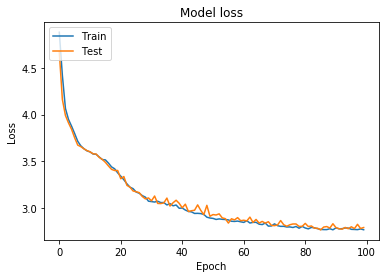

In [68]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [69]:
vae.metrics_names

['loss', 'kl_loss', 'recon_loss']

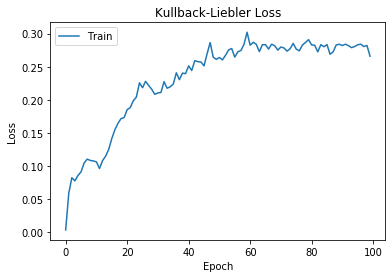

In [70]:
plt.plot(history.history['kl_loss'])
plt.title('Kullback-Liebler Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()